## Research Questions
1. How many hours of daily study time influence passing or failing?

2. Does tuition cost impact the amount of daily study time?

3. Does the cost of Tuition determine passing or failing?

# Data Acquisition

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DaliniPillai/Student_Pass_Fail_Data_Machine_Learning/main/Student-Pass-Fail-Data.csv')

In [ ]:
df.head()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [ ]:
df.shape

(1000, 3)

In [ ]:
df.columns

Index(['Self_Study_Daily', 'Tution_Monthly', 'Pass_Or_Fail'], dtype='object')

# EDA (Exploratory Data Analysis)

In [ ]:
df.head()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


### Self Study Times

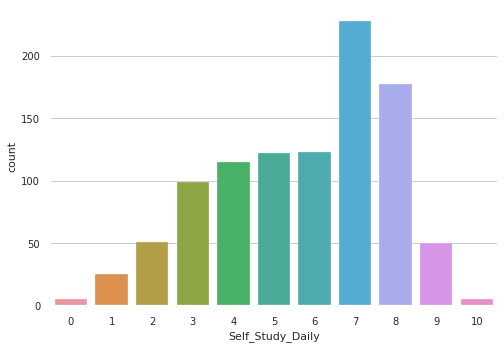

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Self_Study_Daily', data=df)

### Passing or Failing 

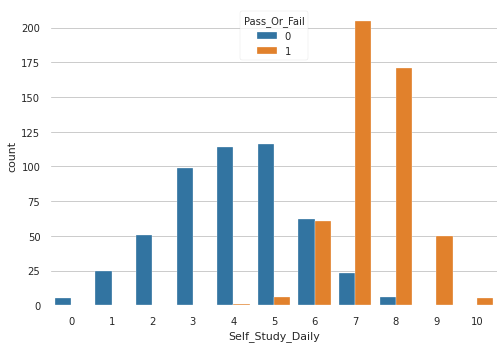

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Self_Study_Daily', hue='Pass_Or_Fail', data=df)

### Cost of Tuition and Passing and failing 

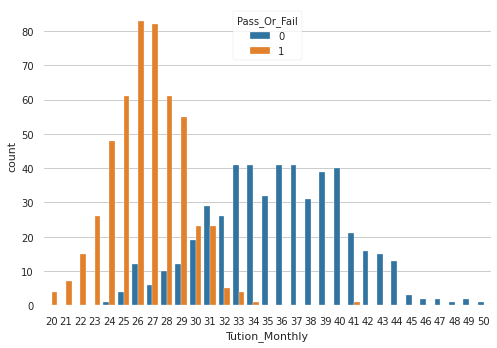

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Tution_Monthly', hue='Pass_Or_Fail', data=df)

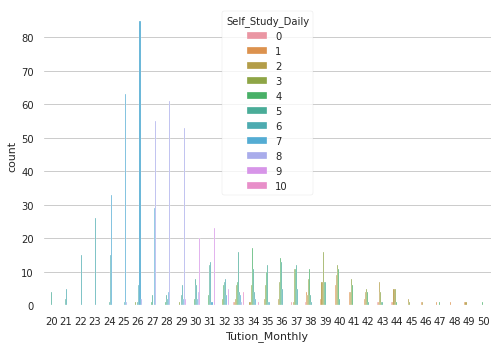

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Tution_Monthly', hue='Self_Study_Daily', data=df)


# Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
df.dropna(inplace=True)

In [ ]:
x = df[['Self_Study_Daily', 'Tution_Monthly']]

In [ ]:
x.head()

,Self_Study_Daily,Tution_Monthly
0,7,27
1,2,43
2,7,26
3,8,29
4,3,42


In [ ]:
y = df[['Pass_Or_Fail']]
y.head()

,Pass_Or_Fail
0,1
1,0
2,1
3,1
4,0


In [ ]:
X.shape

(1000, 2)

In [ ]:
y.shape

(1000, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train[:10])

[[-1.75963422  1.94805333]
 [ 0.13562983 -0.03701322]
 [ 1.08326186 -0.53327986]
 [ 1.08326186 -0.53327986]
 [-2.23345024  1.94805333]
 [ 1.55707788 -0.03701322]
 [ 0.60944585 -0.86412428]
 [ 1.55707788 -0.03701322]
 [ 1.08326186 -0.53327986]
 [ 1.08326186 -0.53327986]]


In [ ]:
classifier = LogisticRegression(multi_class='ovr', random_state = 0)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
predictions = classifier.predict(x_test)
cm = confusion_matrix(predictions, y_test)
print(cm)
accuracy_score(predictions, y_test)

[[ 89   0]
 [  9 102]]


0.955

We can see that our model has an accuracy score of 0.95, which means it is correct 95% of the time

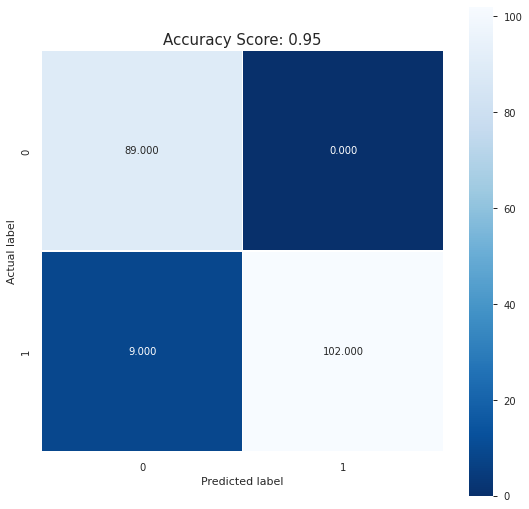

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: 0.95'
plt.title(all_sample_title, size = 15);


### Conclusion: 
We can see that our model has an accuracy score of 0.95, which means it is correct 95% of the time. 

Studying for 7 hours and more increases the chances of passing. Whereas less than 7 increases failing. 

Students that paid a cheaper monthly tuition studied more than students that had a more expensive tuition. 
The students that paid less tuition were more likely to pass than the ones that paid more. 


### KNN Model

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()

In [ ]:
scalar.fit(df.drop('Pass_Or_Fail', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scalar.transform(df.drop('Pass_Or_Fail', axis=1))

In [ ]:
std_data = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [ ]:
std_data.head()

,Self_Study_Daily,Tution_Monthly
0,0.592449,-0.708143
1,-1.766025,1.970413
2,0.592449,-0.875553
3,1.064143,-0.373324
4,-1.294330,1.803004


### Model Building KNN

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, df['Pass_Or_Fail'])

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 2)
(250, 2)
(750,)
(250,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
y_pred

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[125,   2],
       [  0, 123]])

In [ ]:
score = knn.score(x_test,y_test)

In [ ]:
score

0.992

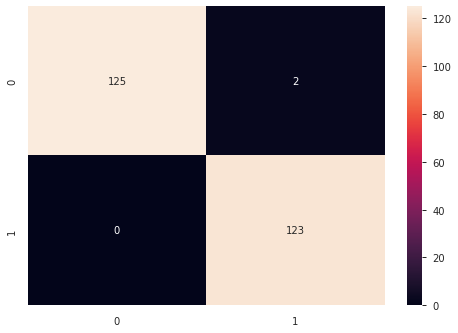

In [ ]:
sns.heatmap(cm, annot=True,fmt='0.0f')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       127
           1       0.98      1.00      0.99       123

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



### KNN with K =5

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn5.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn5 = knn5.predict(x_test)

In [ ]:
y_pred_knn5

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
score_knn5 = knn5.score(x_test,y_test)
score_knn5

0.984

### Error Rate and K Value 

In [ ]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))

(Text(0, 0.5, 'Eror Rate'),)

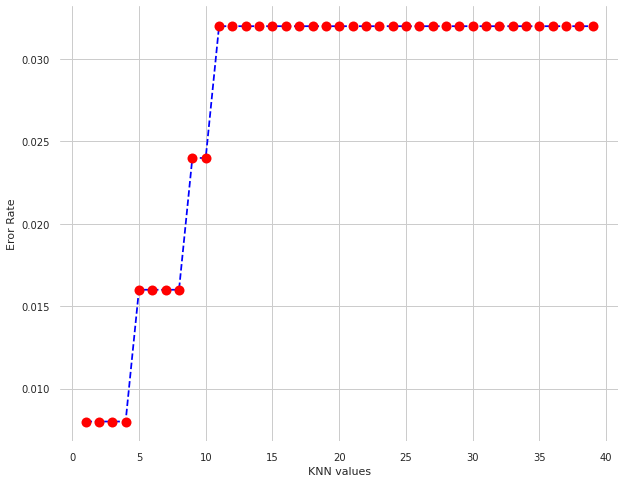

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize =10)
plt.xlabel('KNN values')
plt.ylabel('Eror Rate'), 